In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import warnings;   warnings.filterwarnings("ignore")

In [6]:
path = './drive/MyDrive/PAD/'

Zadanie 1

In [7]:
import pandas as pd
import numpy as np


path = './drive/MyDrive/PAD/'
df = pd.read_csv(f"{path}/wyniki.csv",engine='python', error_bad_lines=False)
df


,plec,ocena_koncowa
0,F,6
1,F,6
2,F,10
3,F,15
4,F,10
...,...,...
352,M,9
353,M,16
354,M,7
355,M,10


In [8]:
significanceLevel = 0.05

print("All ocena_koncowa std:",df["ocena_koncowa"].std())
print("All ocena_koncowa mean:",df["ocena_koncowa"].mean())

mask = (df['plec'] == 'M')
df2 = df.loc[mask]

print("Male ocena_koncowa std:",df2["ocena_koncowa"].std())
print("Male ocena_koncowa mean:",df2["ocena_koncowa"].mean())

mask = (df['plec'] == 'F')
df3 = df.loc[mask]

print("Female ocena_koncowa std:",df3["ocena_koncowa"].std())
print("Female ocena_koncowa mean:",df3["ocena_koncowa"].mean())

x1 = df3["ocena_koncowa"].mean()
x2 = df2["ocena_koncowa"].mean()

std1=df2["ocena_koncowa"].std()
std2=df3["ocena_koncowa"].std()
summary = (x1-x2)/(std1 + std2)
if abs(summary) > significanceLevel:
  print("Hipoteza zerowa odrzucona")

All ocena_koncowa std: 3.227796940207425
All ocena_koncowa mean: 11.523809523809524
Male ocena_koncowa std: 3.2587483861862734
Male ocena_koncowa mean: 11.866279069767442
Female ocena_koncowa std: 3.174451848089712
Female ocena_koncowa mean: 11.205405405405406
Hipoteza zerowa odrzucona


Zadanie 2

                                 OLS Regression Results                                
Dep. Variable:                   Zysk   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              870.1
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                    1.39e-74
Time:                        20:58:36   Log-Likelihood:                         -1522.0
No. Observations:                 200   AIC:                                      3046.
Df Residuals:                     199   BIC:                                      3049.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

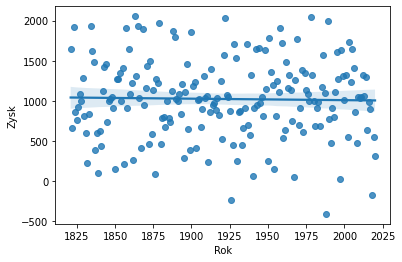

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
df4 = pd.read_csv(f"{path}/ZyskiFirmyX.csv",engine='python', error_bad_lines=False)
df4
X = df4[['Rok']]
Y = df4[['Zysk']]

X=X.astype(float)
Y=Y.astype(float)
model = sm.OLS(Y,X).fit()
print(model.summary())

sns.regplot('Rok', 'Zysk', data=df4)

plt.show()

Jak widzimy trend jest stały.

Zadanie 3

In [21]:
import plotly.express as px

df5 = pd.read_csv(f"{path}/spendingscores.csv",engine='python', error_bad_lines=False)
df5 = pd.get_dummies(df5, columns=['Gender'], drop_first=True)
print(df5)
X2 = df5[['SpendingScore']]
Y2 = df5[['AnnualIncome','Age','Gender_Male']]

model2 = sm.OLS(X2,Y2).fit()
print(model2.summary())

     Age  AnnualIncome  SpendingScore  Gender_Male
0     19            15             39            1
1     21            15             81            1
2     20            16              6            0
3     23            16             77            0
4     31            17             40            0
..   ...           ...            ...          ...
195   35           120             79            0
196   45           126             28            0
197   32           126             74            1
198   32           137             18            1
199   30           137             83            1

[200 rows x 4 columns]
                                 OLS Regression Results                                
Dep. Variable:          SpendingScore   R-squared (uncentered):                   0.697
Model:                            OLS   Adj. R-squared (uncentered):              0.692
Method:                 Least Squares   F-statistic:                              150.9
Date:       

In [22]:
print("Model P Values:", model2.pvalues.values)
print("Model Std Errs:", model2.bse.values)
print("Model Coef:", model2.params.values)

Model P Values: [1.75955213e-10 2.46066001e-04 3.71296141e-01]
Model Std Errs: [0.06746333 0.10948244 4.42241022]
Model Coef: [0.45434089 0.40887651 3.96289597]


In [23]:
px.imshow(df5.corr(), color_continuous_scale='Agsunset', title="Correlation heatmap")

Odrzucamy zmienną AnnualIncome

In [24]:
X2 = df5[['SpendingScore']]
Y2 = df5[['Age','Gender_Male']]

model3 = sm.OLS(X2,Y2).fit()
print(model3.summary())
print("Model P Values:", model3.pvalues.values)
print("Model Std Errs:", model3.bse.values)
print("Model Coef:", model3.params.values)

                                 OLS Regression Results                                
Dep. Variable:          SpendingScore   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.623
Method:                 Least Squares   F-statistic:                              166.4
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                    3.99e-43
Time:                        21:13:40   Log-Likelihood:                         -991.75
No. Observations:                 200   AIC:                                      1988.
Df Residuals:                     198   BIC:                                      1994.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------